In [1]:

import sys
import importlib
sys.path.insert(0, '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc')

import my_plot
importlib.reload(my_plot)
from my_plot import MyPlotData, my_box_plot

def to_ng_coord(coord):
    return (
        int(coord[0]/4),
        int(coord[1]/4),
        int(coord[2]/40),
        )

script_n = 'grc_locations_all_210514_center_z'

# def get_eucledean_dist(a, b):
#     return np.linalg.norm(
#         (a[0]-b[0], a[1]-b[1], a[2]-b[2]))

# def get_distance(u, v):
#     return get_eucledean_dist(u, v)

import compress_pickle
# input_graph = compress_pickle.load('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/mf_grc_model/input_graph_201114_restricted_z.gz')
# input_graph = compress_pickle.load('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/mf_grc_model/input_graph_201114.gz')


fname = ('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/'\
                                   'mf_grc_model/input_graph_210407_all.gz')
input_graph = compress_pickle.load(fname)


grcs = [k for k in input_graph.grcs.keys()]

# z_min = 15
# z_max = 35
z_min = 19800-2500
z_max = 29800+2500
# z_min = 0
# z_max = 50
x_min = 280
x_max = 600
mpd = MyPlotData()
# claw_lengths = defaultdict(int)
num_grcs = 0
for grc_id in input_graph.grcs:
    grc = input_graph.grcs[grc_id]
    soma_loc = grc.soma_loc
    x, y, z = soma_loc
    if x < x_min*1000 or x > x_max*1000:
        continue
    if z < z_min or z > z_max:
        continue
    mpd.add_data_point(
#         x=x/1000-x_min,
        x=x/1000/4,
        y=500-y/1000,
        z=z/1000,
        claw_count=max(len(grc.edges), 2),
        )
    num_grcs += 1

print(f'Counted {num_grcs} grcs within bounds')



Counted 762 grcs within bounds


Height: 1.206896551724138, Aspect: 2.9


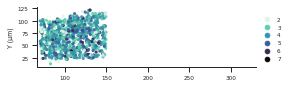

In [2]:

def custom_legend_fn(plt):
#     plt.legend(bbox_to_anchor=(1.025, .8), loc='upper left', borderaxespad=0.)
    plt.legend(bbox_to_anchor=(1, .925), loc='upper left', frameon=False)

save_filename=f'{script_n}_xy.svg'
import seaborn as sns
importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    context='paper',
    font_scale=.65,
    kind='scatter',
    x="x",
    y="y",
    s=10,
    linewidth=0,
    alpha=.9,
    aspect=2.9,
    width=3.5,
    xlim=(None, x_max-x_min+10),
    hue="claw_count",
    palette=sns.color_palette("mako_r", as_cmap=True),
    save_filename=save_filename,
    y_axis_label='Y (μm)',
#     title='Granule Cell Cell Body Locations',
#     x_axis_label='Dorsal-ventral Axis: X (μm)',
    custom_legend_fn=custom_legend_fn,
    show=True,
    )


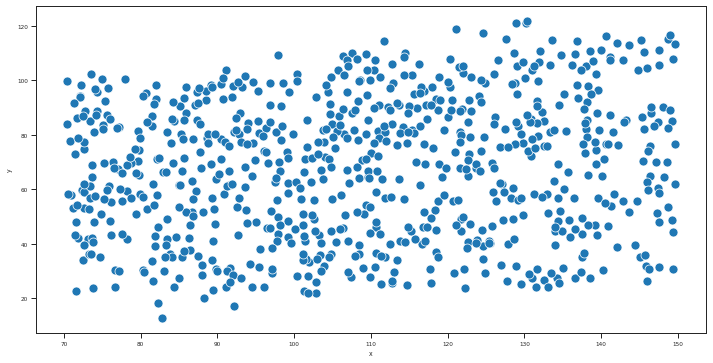

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(12, 6))
importlib.reload(my_plot); my_plot.my_scatterplot(
    mpd,
    x="x",
    y="y",
    ax=ax,
#     xlim=[-40, 40],
#     ylim=[-40, 40],
#     y_axis_label='Z claw position (µm)',
#     x_axis_label='Y claw position (µm)',
#     context='paper',
#     kind='scatter',
#     save_filename=f'{script_n}_scatter.svg',
#     show=True,
    )

Height: 6, Aspect: 1.33


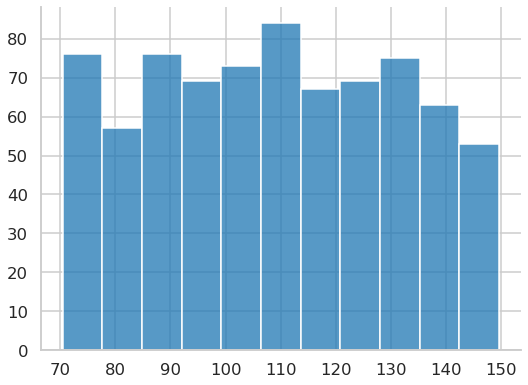

In [4]:

importlib.reload(my_plot); my_plot.my_displot(
    mpd,
    x="x",
    )

Height: 6, Aspect: 1.33


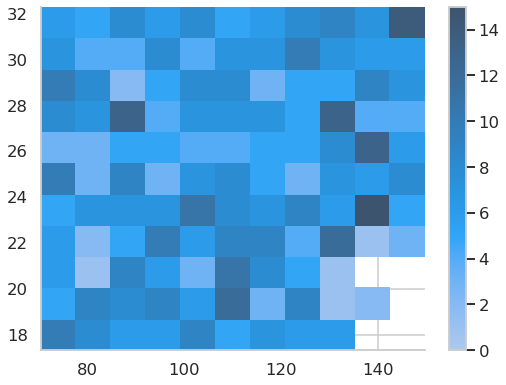

In [5]:

importlib.reload(my_plot); my_plot.my_displot(
    mpd,
    x="x",
    y='z',
    cbar=True,
    )

In [ ]:

save_filename=f'{script_n}_xz.svg'
import seaborn as sns
importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
#     context='paper',
#     font_scale=1,
    kind='scatter',
    x="x",
    y="z",
    aspect=2.9,
    width=10,
    xlim=(None, x_max-x_min+10),
#     size="claw_count",
    hue="claw_count",
    palette=sns.color_palette("mako_r", as_cmap=True),
    # alpha=.9,
    y_axis_label='Z (μm)',
    x_axis_label='X (μm)',
    save_filename=save_filename,
    custom_legend_fn=custom_legend_fn,
    show=True,
    )
